<a href="https://colab.research.google.com/github/Krish695/AngryBirdStage3.5/blob/master/c_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
data_to_load=files.upload()

In [ ]:
import pandas as pd
import plotly.express as px
df=pd.read_csv ("qqq.csv") 
score_list=df["Score"].tolist()
accepted_list=df["Accepted"].tolist()
fig=px.scatter (x=score_list,y=accepted_list)
fig.show()

In [ ]:
import numpy as np
score_array=np.array(score_list)
accepted_array=np.array(accepted_list)

m,c=np.polyfit(score_array,accepted_array,1)

y=[]
for x in score_array:
  y_value=m*x+c
  y.append(y_value)
fig=px.scatter (x=score_array,y=accepted_array)
fig.update_layout(shapes=[
                          dict(
                              type ='line',
                               y0=min(y),y1=max(y),
                               x0=min(score_array),x1=max(score_array)
                          )
                          ])
fig.show()


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



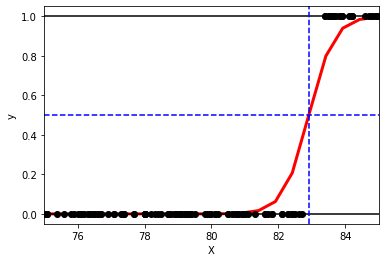

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
X=np.reshape(score_list,(len(score_list),1))
Y=np.reshape(accepted_list,(len(accepted_list),1))
lr=LogisticRegression()
lr.fit(X,Y)

plt.figure()
plt.scatter(X.ravel(),Y,color='black',zorder=20)
def model(x):
  return 1/(1+np.exp(-x))

X_test=np.linspace(0,100,200)
chances= model(X_test*lr.coef_+lr.intercept_).ravel()
plt.plot(X_test, chances, color='red', linewidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')

plt.axvline(x=X_test[165],color='b',linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(75,85)
plt.show()

In [ ]:
user_score=float(input("enter your marks here"))
chances= model(user_score*lr.coef_+lr.intercept_).ravel()[0]
if chances <= 0.01:
  print("the student is not accepted")
elif chances >=1:
  print("the student will get accepted")
elif chances <0.5:
  print("the student might not get accepted")
else:
  print("the student may get accepted")

enter your marks here84
the student may get accepted
